## Importing Data & getting Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_excel('dataset/Credit Card Customer Data.xlsx')

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data = data.drop(['Sl_No' ,'Customer Key'] ,axis=1)

In [6]:
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


## Handling Missing Data

In [7]:
data.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<AxesSubplot:>

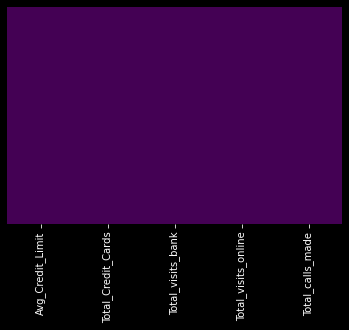

In [8]:
sns.heatmap(data.isnull(),yticklabels=False ,cbar=False ,cmap='viridis')

# Univariate Analysis

## --> Displots

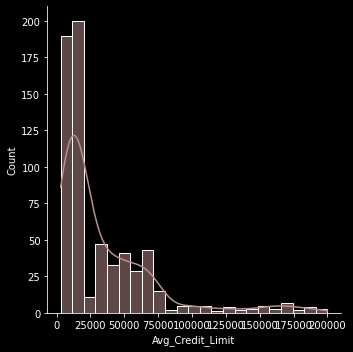

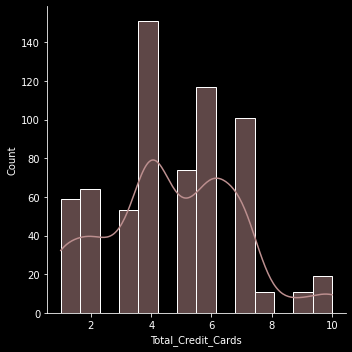

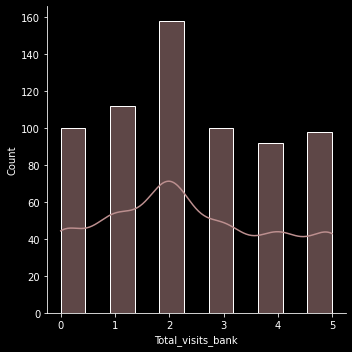

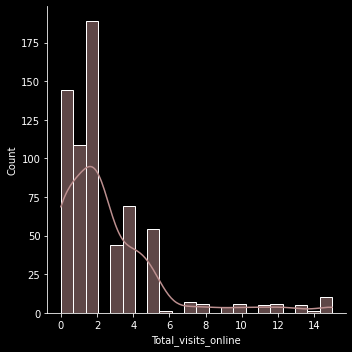

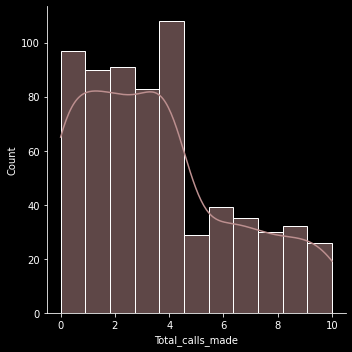

In [9]:
for feature in data.columns: 
    sns.displot(data[feature] ,kde=True ,color='rosybrown')
    plt.show()

## --> Pie-Plots

In [10]:
features = ['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

In [11]:
data_ = data.copy()
data_['Total_Interactions'] = data_['Total_visits_bank'] + data_['Total_visits_online'] + data_['Total_calls_made']

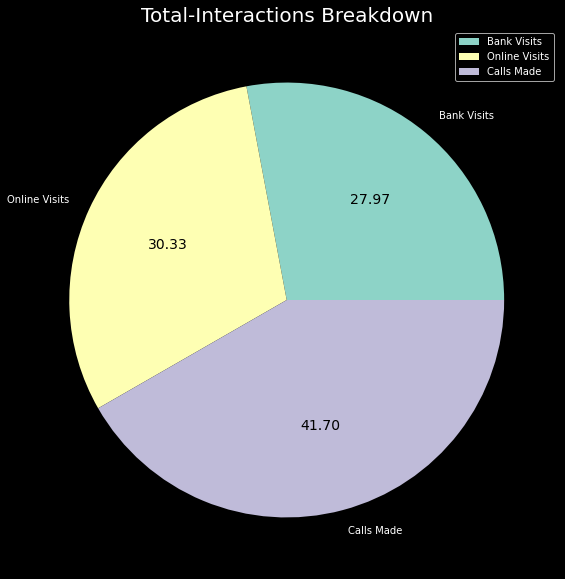

In [12]:
plt.figure(figsize=(10,10))
feature_percent = []

for feature in features: 
    feature_percent.append((data_[feature].sum() / data_['Total_Interactions'].sum()) * 100)

pathches ,texts ,autotexts = plt.pie(feature_percent,labels=['Bank Visits', 'Online Visits', 'Calls Made'] ,autopct='%1.2f' ,textprops=dict(color='w'))

plt.legend(loc='best')
plt.title('Total-Interactions Breakdown', fontsize=20)
plt.setp(autotexts, color='black', fontsize=14)
autotexts[1].set_color('black')
plt.show()


## --> Pairplot

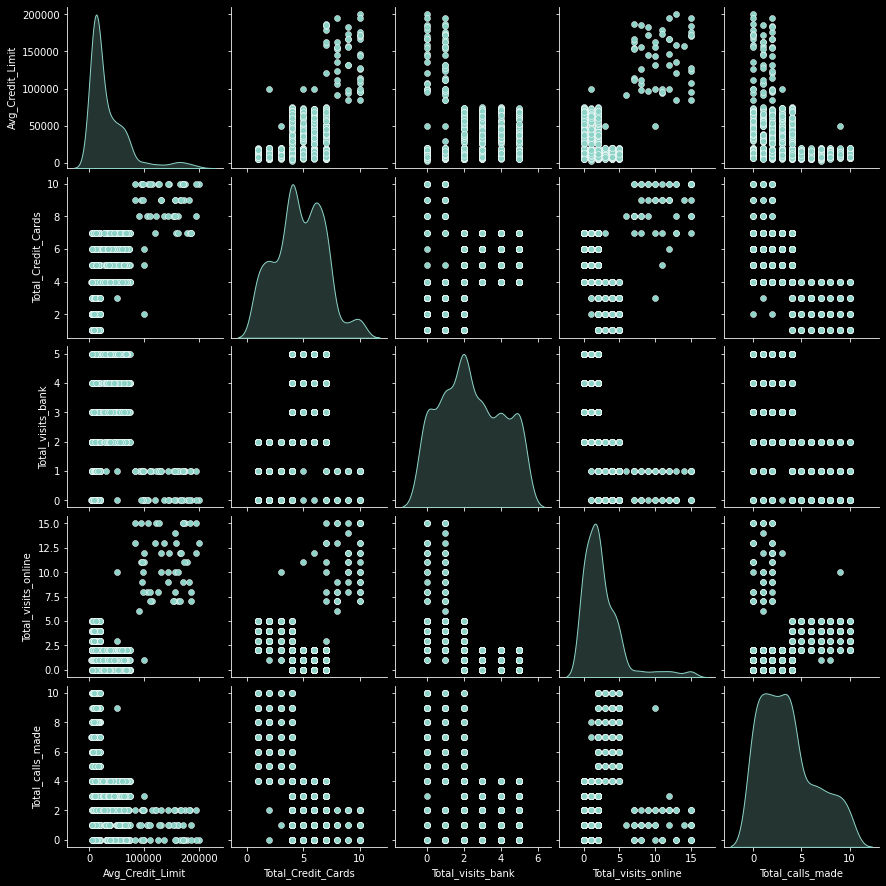

In [13]:
sns.pairplot(data ,dropna=True ,diag_kind='kde')

## Correlation

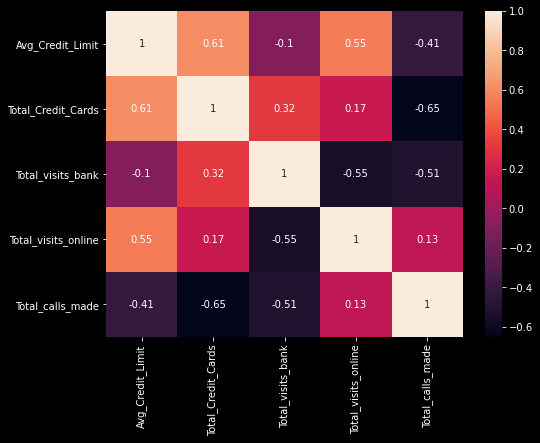

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr() ,annot=True)
plt.show()

# Bivariate Analysis

## --> Analysing Total_Credit_Cards v/s Avg_Credit_Limit (correlation = 0.61)

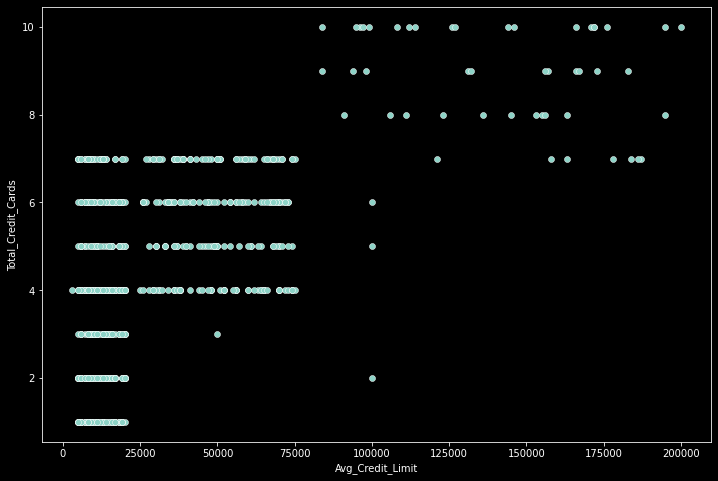

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards',data=data)
plt.show()

### There are two clusters: Customers with Average Credit Limit >100000 And Customers with Average Credit Limit < 75000

## --> Analysing Total_visits_banks v/s Avg_Credit_Limit (correlation = -0.1)

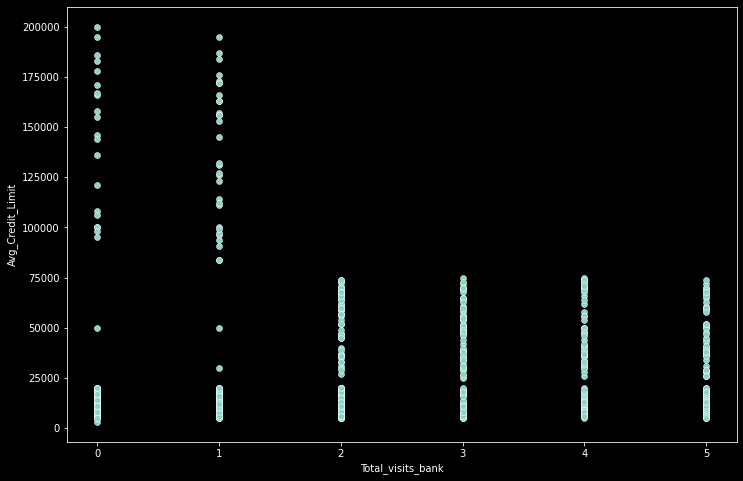

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_bank', y='Avg_Credit_Limit', data=data)
plt.show()

### People with Average Limit > ~70000 make 0 to 1 visits to the bank whereas people with Average Credit Limit < ~70000 visit frequently i.e. 2 to 5 times

## --> Analysing Total_visits_online v/s Avg_Credit_Limit (correlation = 0.55)

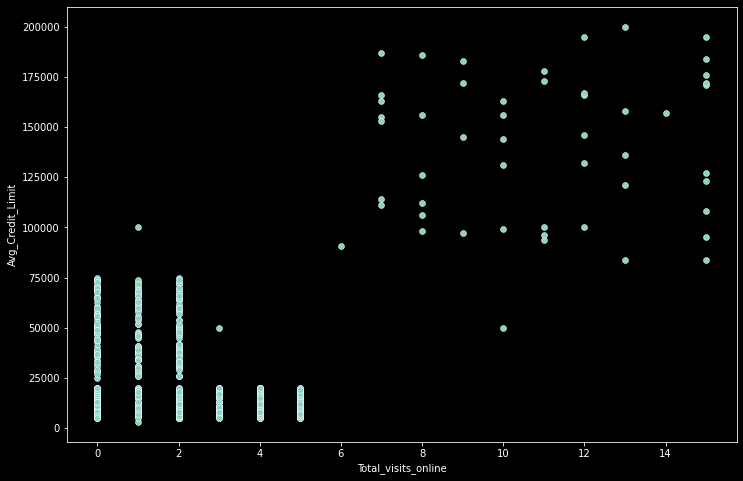

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_online', y='Avg_Credit_Limit', data=data)
plt.show()

### There are two clusters: Customers with Average Credit Limit <75000 (visiting less frequently online) & customers with Average Credit Limit > 75000 (visiting more frequently online i.e > 7 times)

## --> Analysing Total_visits_online v/s Total_Credit_Cards (correlation = 0.17)

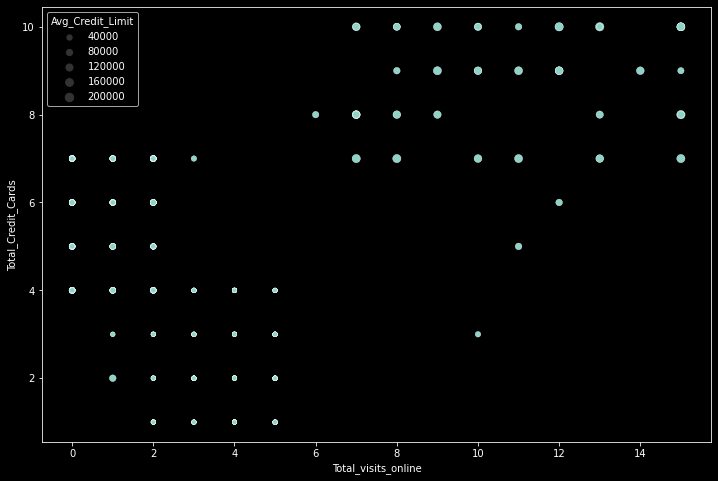

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_online', y='Total_Credit_Cards', size='Avg_Credit_Limit', data=data)
plt.show()

### There are two clusters: Customers with Credit-Cards < 7 (visiting less frequently online) & customers with Credit-Cards > 7 and average-limit > 80000    (visiting more frequently online i.e > 7 times)

## --> Analysing Total_visits_online v/s Total_calls_made (correlation = 0.13)

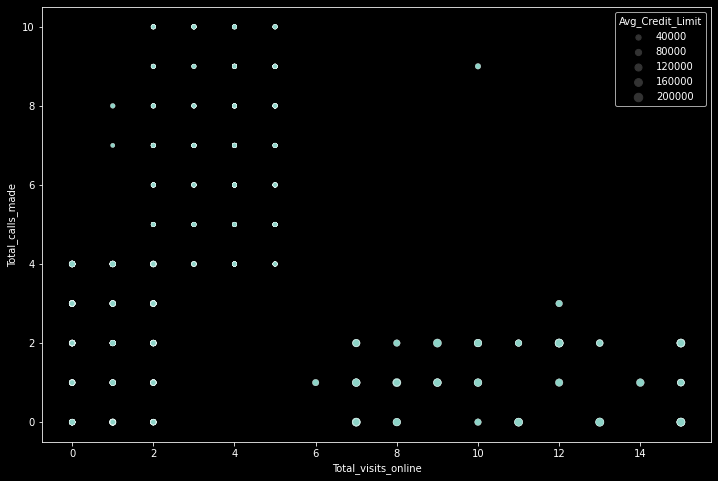

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_online', y='Total_calls_made',
                size='Avg_Credit_Limit', data=data)
plt.show()

### There are two clusters: Customers who visit less frequently online make more phone calls & customers with average-limit > 80000    (visiting more frequently online)

## --> Analysing Total_Interactions v/s Avg_Credit_Limit (correlation = 0.07)

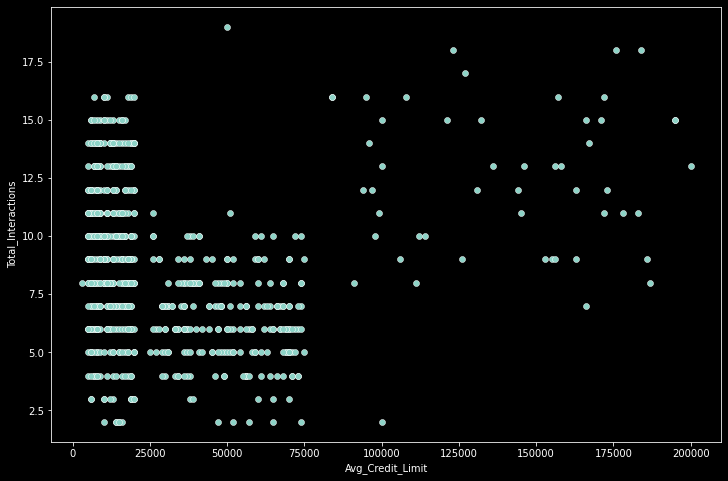

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Interactions',data=data_)
plt.show()

### Customers can be segmented on the basis of Total interactions or total complaints with bank and the average credit limit.

## Scaling

In [21]:
X = data.iloc[: ,:].values
X.shape

(660, 5)

In [22]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# KMeans Clustering

## Plotting inertia-vs-clusters graph (aka Elbow Curve) to find the optimal amount of clusters for the dataset

In [23]:
from sklearn.cluster import KMeans

L = []
for i in range(1, 20):
    model = KMeans(n_clusters=i, init='k-means++',random_state=42)
    model.fit(scaled_data)
    L.append(model.inertia_)

frame = ({'i': range(1, 20), 'L': L})

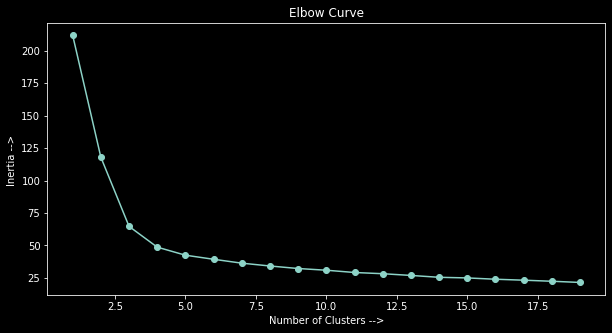

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(frame['i'], frame['L'], marker='o')
plt.xlabel('Number of Clusters -->')
plt.ylabel('Inertia --> ')
plt.title('Elbow Curve')
plt.show()

### There is smooth descent afer n_clusters = 3 ,so we will choose number of clusters as 3.

## Silhoutte Score 
### --> The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
### --> Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering 

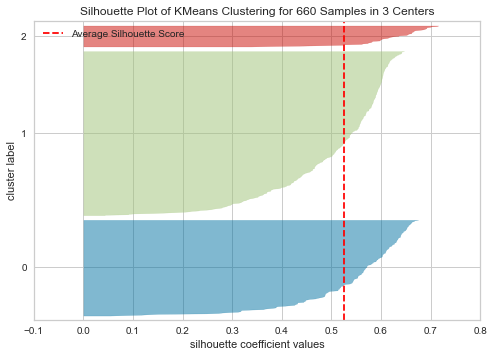

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer 

model = KMeans(n_clusters=3 ,init='k-means++' ,random_state=42)
sil_visualizer = SilhouetteVisualizer(model ,colors='yellowbrick')
sil_visualizer.fit(scaled_data)
sil_visualizer.show()
plt.show()

In [26]:
print('Average Silhoutte Score : {}'.format(sil_visualizer.silhouette_score_))

Average Silhoutte Score : 0.5254186541442241


## Model training

In [27]:
model = KMeans(n_clusters=3 ,init='k-means++' ,random_state=42)
y_pred = model.fit_predict(X)

In [28]:
y_pred

array([0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [29]:
cluster = pd.DataFrame(y_pred ,columns=['Cluster'])
cluster

,Cluster
0,0
1,0
2,0
3,2
4,0
...,...
655,0
656,0
657,1
658,1


In [30]:
data= pd.concat([data,cluster], axis=1)

## Model Evaluation

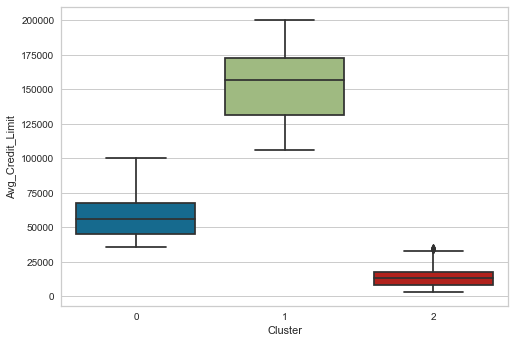

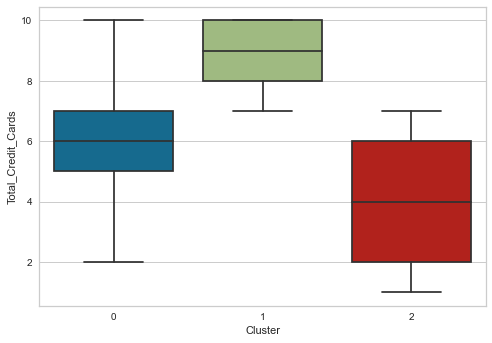

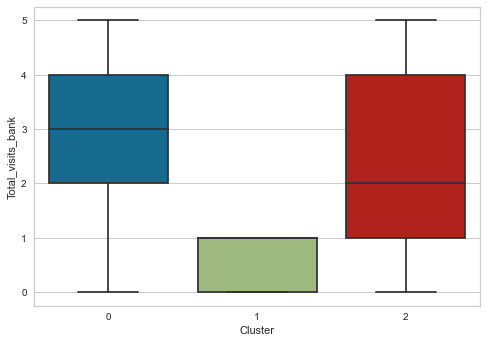

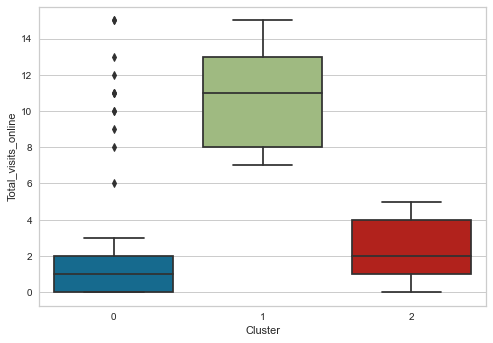

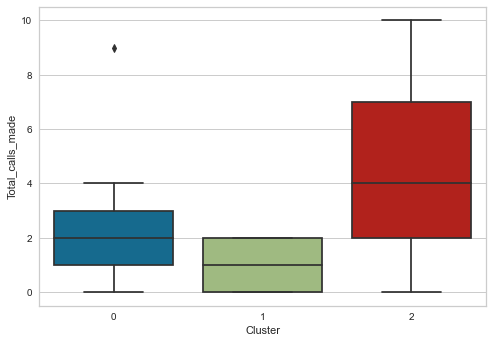

In [31]:
cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
        'Total_visits_online', 'Total_calls_made']
        
for feature in cols:
        sns.boxplot(x='Cluster', y=feature, data=data)
        plt.show()

# Hierarchical Clustering

## Dendrogram 
### --> Linkages : 
### Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion
- 'ward' minimizes the variance of the clusters being merged.
- 'average' uses the average of the distances of each observation of the two sets.
- 'complete' or 'maximum' linkage uses the maximum distances between
all observations of the two sets.
- 'single' uses the minimum of the distances between all observations
of the two sets.

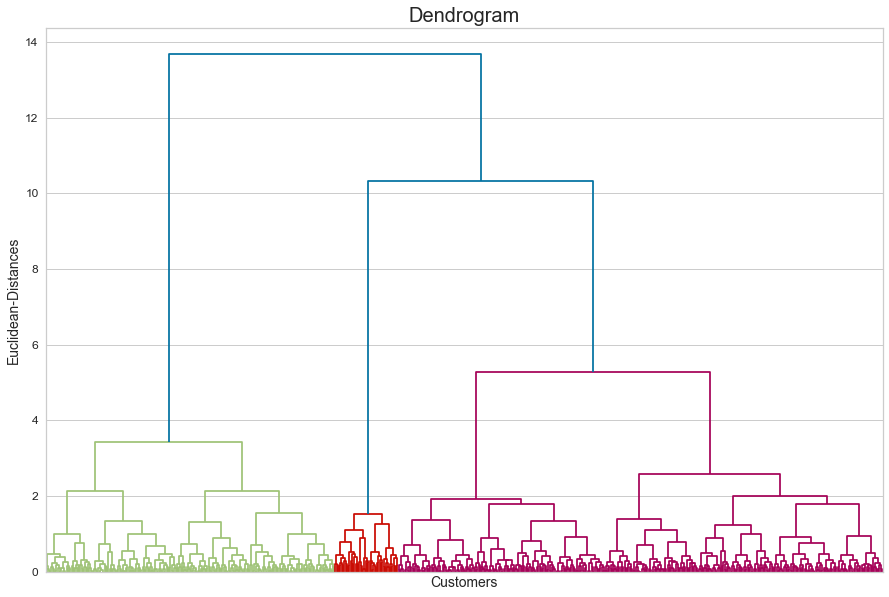

In [32]:
import scipy.cluster.hierarchy as sch 

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(scaled_data ,method='ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers',fontsize=14)
plt.ylabel('Euclidean-Distances',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=12)
plt.show()


## Cophenetic Correlation

In [33]:
from scipy.cluster.hierarchy import cophenet 
coph_ceff = np.mean(cophenet(sch.linkage(scaled_data)))
print('The cophenetic correlation is : {}'.format(coph_ceff))

The cophenetic correlation is : 0.21442781737262284


## Model training (by Agglomerative Clustering)
### --> aka bottom-up clustering
### --> Recursively merges the pair of clusters that minimally increases a given linkage distance. 

In [34]:
from sklearn.cluster import AgglomerativeClustering
model_hc = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',linkage='ward')
y_pred_hc = model_hc.fit_predict(X)

In [35]:
y_pred_hc

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
hcluster = pd.DataFrame(y_pred_hc, columns=['HCluster'])
hcluster

,HCluster
0,1
1,0
2,0
3,0
4,1
...,...
655,1
656,1
657,2
658,2


In [37]:
data = pd.concat([data ,hcluster] ,axis=1)

## Model Evaluation

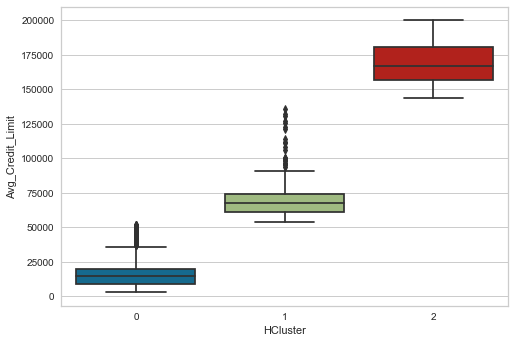

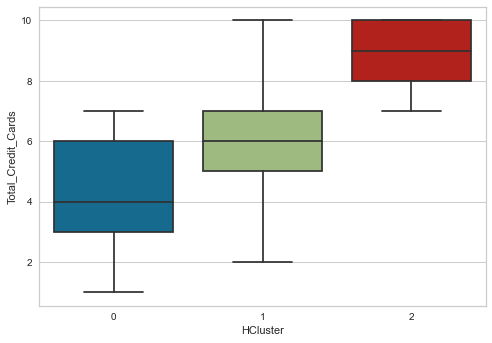

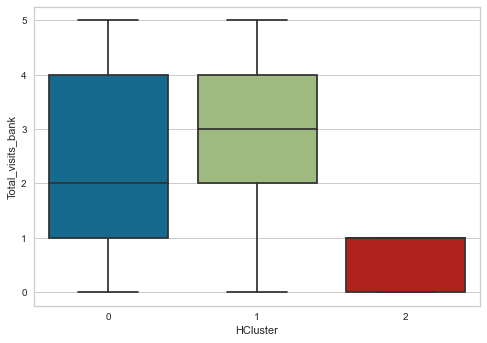

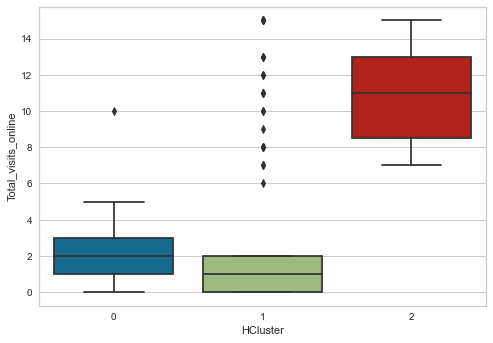

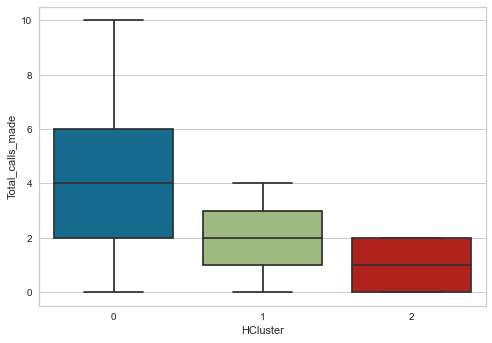

In [38]:
for feature in cols:
    sns.boxplot(x='HCluster', y=feature, data=data)
    plt.show()

# Comparing Models

## Average Silhoutte Score
### --> Its analysis is as follows :

- +1 Score −> Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

-  0 Score −> 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

- -1 Score −> -1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

In [39]:
from sklearn.metrics import silhouette_score 

kmeans_score = silhouette_score(scaled_data ,y_pred)
print('Silhoutte Score for KMeans is : {}'.format(kmeans_score))

hier_score = silhouette_score(scaled_data, y_pred_hc)
print('Silhoutte Score for Hierarchical-Clustering is : {}'.format(hier_score))

Silhoutte Score for KMeans is : 0.14678066169984869
Silhoutte Score for Hierarchical-Clustering is : 0.11914770655113151


### Silhoutte Score for KMeans is greater than that of Hierarchical-Clustering

## Observations 

CLUSTER 0 --> 
Cluster 0 has low credit limit and more number of total credit cards.

-This maybe the indication that they have high credit usage and low income.

-Segment 0 makes complaints by the medium of phone calls.

-The bank can arrange periodical feedback phone calls from Relationship Managers at the bank

Approach Method : They can be targeted for cross selling by the medium of phone calls

-------------------------------------------------------------------------------------------------------------------------------------------------

CLUSTER 1-->
Cluster 1 makes : 

-less number of phone calls

-highest number of online visits

-does not visit the bank at all

-This maybe the indication that Segment 1 is literate and premium customers of the bank with higher income.

Approach Method : Luxury offers through emails and offers related to online shopping or coupons can be targeted to this segment They have the potential of being most profitable customers

--------------------------------------------------------------------------------------------------------------------------------------------------

CLUSTER 2 -->
Cluster 2 have almsot similar characterstics:

-Median of 3 visits to the bank

-Relatively higher visits to the bank

-holds 4-6 Total Credit Cards

Approach Method : Both can targeted for cross selling through in bank managers and promotional advertisements in the bank

Servicescape Promotions are Promotions done in the environment where the service is offered

---------------------------------------------------------------------------------------------------------------------------------------------------